### Importing the libraries

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


### Loading the dataset

In [250]:
df=pd.read_csv("D:\project\Codsoft\Credit Card Fraud Detection\creditcard.csv")

In [251]:
#Printing the top 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [252]:
# Printing the last 5 rows of the dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [253]:
#getting the consise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [254]:
#Checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### The dataset has no null values

In [255]:
#getting the count, mean, standard deviation, minimum, maximum, and quantiles of the data.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [256]:
# Finding out the no of total no of transactions,fraud and non-fraud transactions
total_cases=len(df["Class"])
non_fraud=len(df[df.Class==0])
fraud=total_cases-non_fraud
ratio=(fraud/total_cases)*100
print("The total no of genuine transactions=",total_cases)
print("Total no of non fraud transactions=",non_fraud)
print("Total no of fraud transactions=",fraud)
print("The ratio of fraud transactions=",round(ratio,3))



The total no of genuine transactions= 284807
Total no of non fraud transactions= 284315
Total no of fraud transactions= 492
The ratio of fraud transactions= 0.173


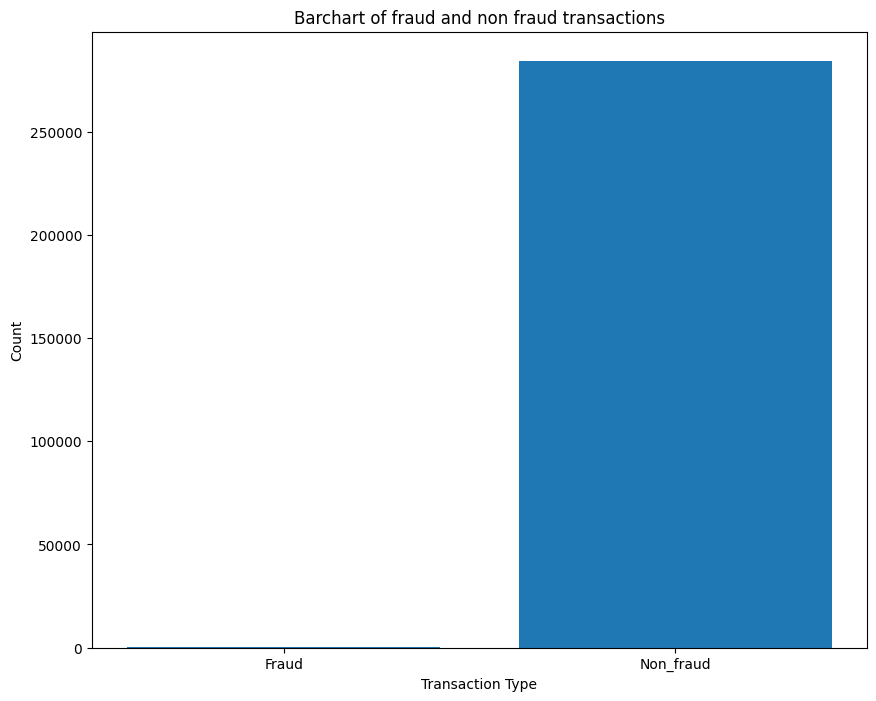

In [257]:
#Bar plot of total no of fraud and non-fraud transactions
plt.figure(figsize=(10,8))
d=pd.DataFrame({"Type":["Fraud","Non_fraud"],"count":[fraud,non_fraud]})
d
plt.bar(d["Type"], d["count"], label="Spam and Ham Messages")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Barchart of fraud and non fraud transactions")
plt.show()


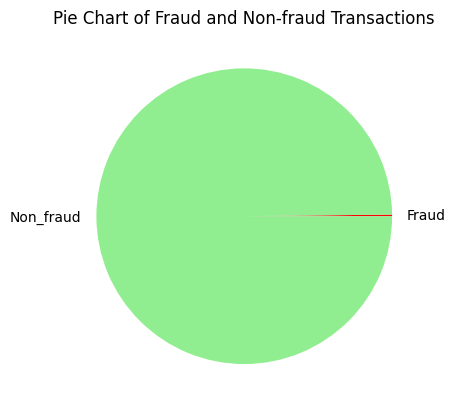

In [258]:
#Bar plot of total no of fraud and non-fraud transactions
colors = ["red", "lightgreen"]
plt.pie(d["count"], labels=d["Type"],colors=colors)
plt.title("Pie Chart of Fraud and Non-fraud Transactions")
# Show the plot
plt.show()

Text(0.5, 1.0, 'Correlation between class and other variables')

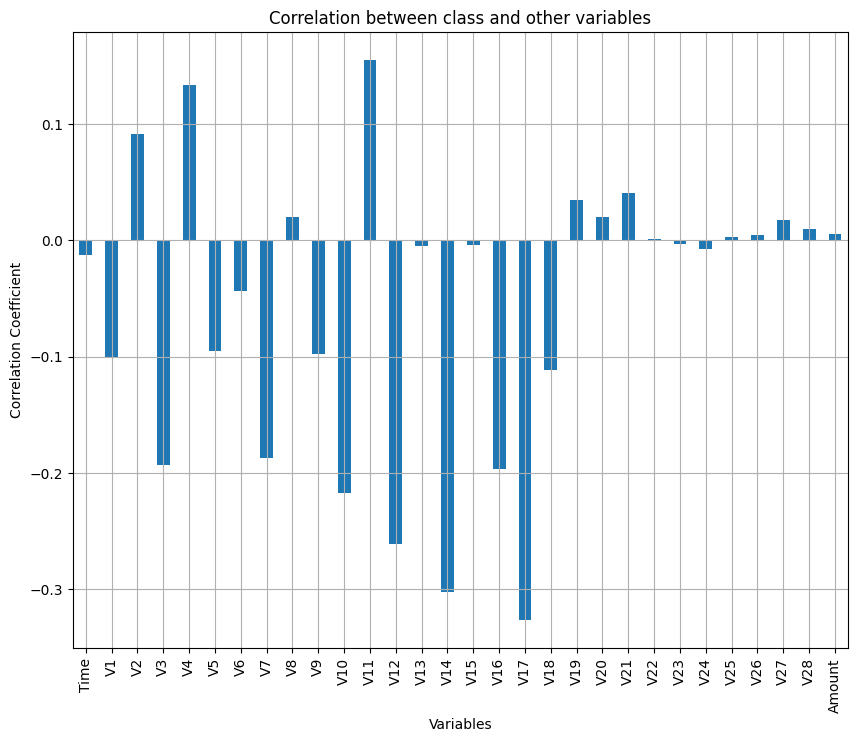

In [259]:
#Correlation between class variable and other variables.
d2=df.drop("Class",axis=1)
d2
corr_with_class=d2.corrwith(df["Class"])
corr_with_class.plot.bar(figsize=(10,8),grid=True)
plt.xlabel("Variables")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation between class and other variables")

Text(0.5, 1.0, 'Heatmap of Correlation')

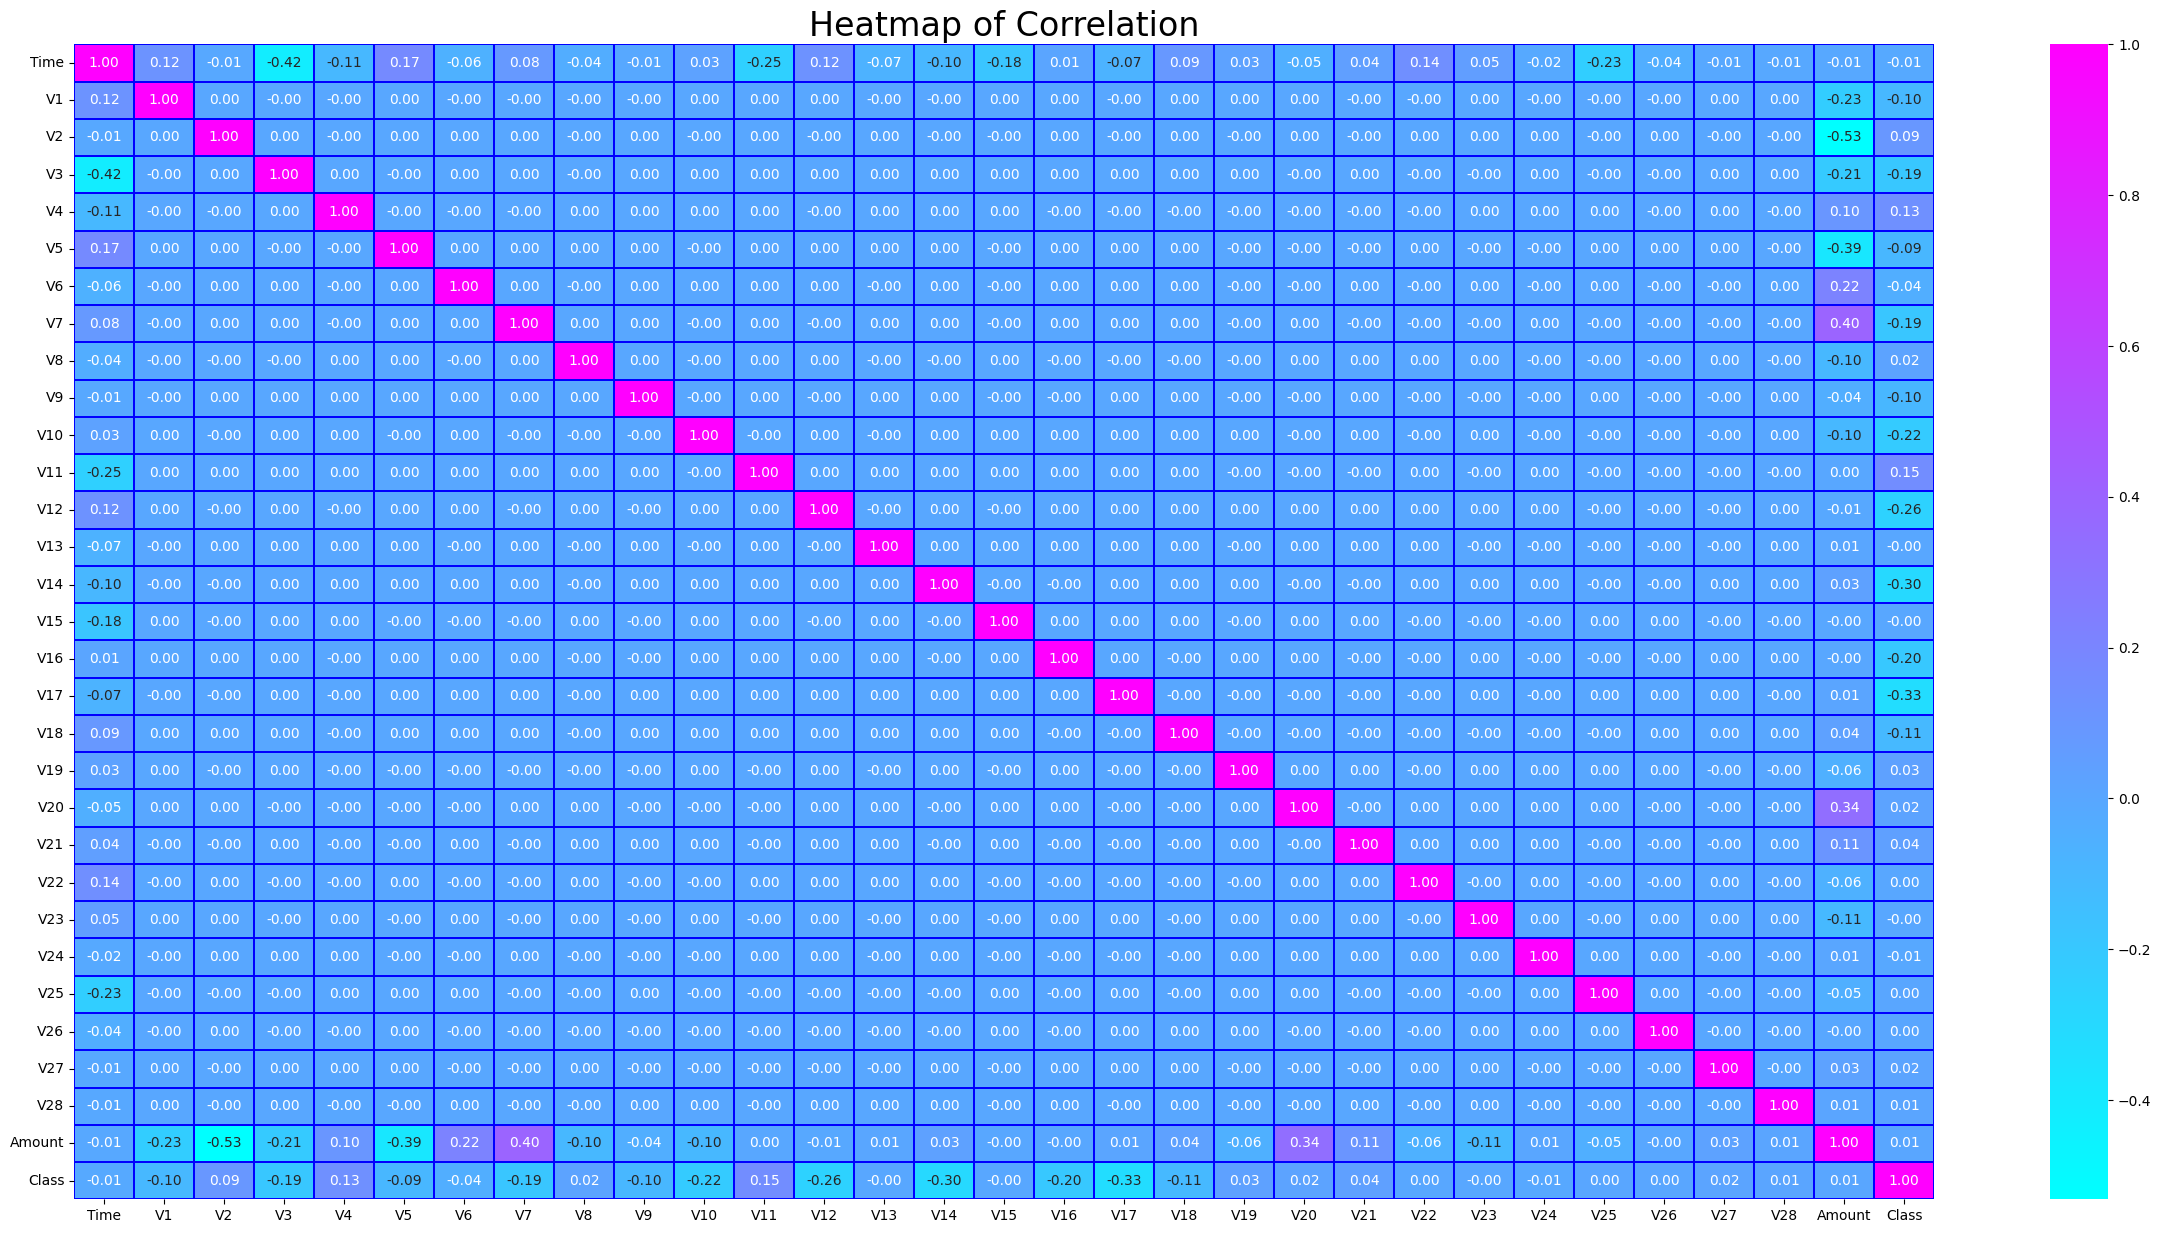

In [260]:
#Correlation matrix
plt.figure(figsize=(30,15))
corr=df.corr()
sns.heatmap(corr,annot=True,linecolor="blue",linewidths=0.1,cmap="cool",fmt=".2f")
plt.title("Heatmap of Correlation",fontsize=24)

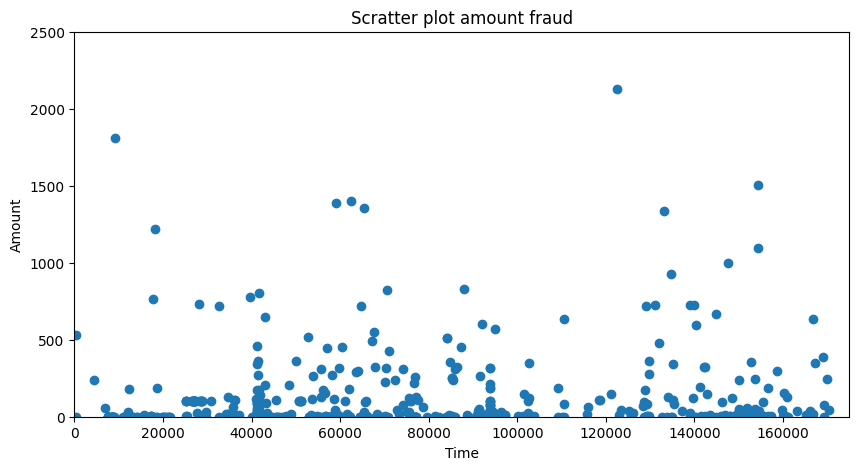

In [261]:
#Scatterplot of amount vs fraud
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(10,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [262]:
## Seprating data for analysis
fraud = df[df.Class==1]
genuine = df[df.Class==0]

In [263]:
#Finding out the no of rows and columns of the fraud and non-fraud transactions
print(df.shape)
print(fraud.shape)
print(genuine.shape)

(284807, 31)
(492, 31)
(284315, 31)


In [264]:
## we will analyze transition amount during fraud cases
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [265]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#### We can see that the no of fraud transactions in the dataset is 492 and no of genuine transations is 284315.So the dataset is purely unbalanced.We will do undersampling.
#### Undersampling is a technique used to balance imbalanced datasets by removing data points from the majority class. This is done to reduce the bias in the dataset and to improve the performance of machine learning models.Undersampling is of two types random undersampling and clustering undersampling.we will do random undersampling in this case.
####  Random undersampling: This involves randomly removing data points from the majority class until the size of the majority class is equal to the size of the minority class.

In [266]:
## Now will try to make dataset balance by taking same value of fradulant data and normal data
genuine_sample = genuine.sample(n=492)

In [267]:
#Merging the sample of genuine transactions with the fraud transactions
new_dataset = pd.concat([genuine_sample,fraud],axis=0)

In [268]:
#showing the top 5 rows of the new dataset
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65288,51514.0,1.199185,0.269953,0.568721,1.097667,-0.132343,-0.047148,-0.137284,0.030371,0.098908,...,-0.071679,-0.130225,0.016638,-0.293491,0.401079,-0.427983,0.052862,0.025002,2.00,0
131394,79585.0,0.983546,-1.211997,-0.941026,-0.560824,1.158206,3.726692,-0.969074,0.855011,-0.884753,...,-0.168269,-0.567688,-0.207010,0.973253,0.496732,-0.310980,0.035204,0.064961,207.15,0
240541,150650.0,1.993362,0.183245,-2.184490,0.640390,0.544786,-0.869180,0.178935,-0.127531,0.730423,...,-0.151707,-0.217269,-0.002878,-0.676545,0.191836,-0.282801,0.006171,-0.023875,16.00,0
12807,22473.0,-1.996314,-0.376286,2.096575,-0.488128,-0.417408,-0.523117,-0.460097,0.644482,1.473081,...,-0.098581,-0.373717,0.133479,0.552084,-0.093636,0.717004,0.100928,-0.069133,97.55,0
138046,82459.0,-1.837476,0.692999,0.393116,-1.536822,0.156830,-0.971460,0.077315,0.831491,-0.681034,...,0.227834,0.328749,-0.242988,0.327754,-0.135595,0.735458,-0.322946,-0.150184,5.07,0


In [269]:
## now we made new dataframe with Uniform distribution of fraud data and normal data
new_dataset["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

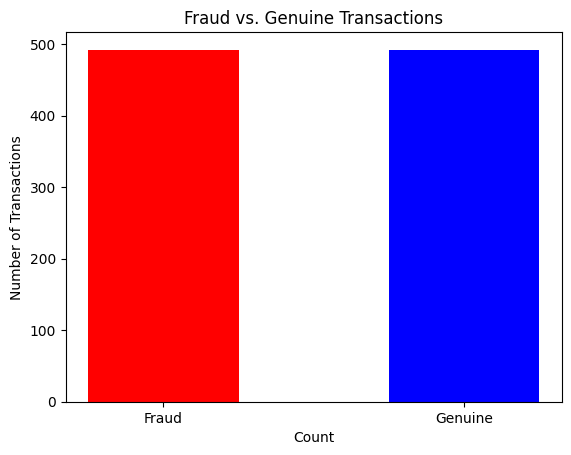

In [270]:
# Create the DataFrame
d = pd.DataFrame({"Class": ["Fraud", "Genuine"], "Count": [492, 492]})

# Create the histogram
plt.bar(d["Class"],d["Count"],width=0.5,color=["red", "blue"])

# Add a title and labels
plt.title("Fraud vs. Genuine Transactions")
plt.xlabel("Count")
plt.ylabel("Number of Transactions")

# Show the plot
plt.show()

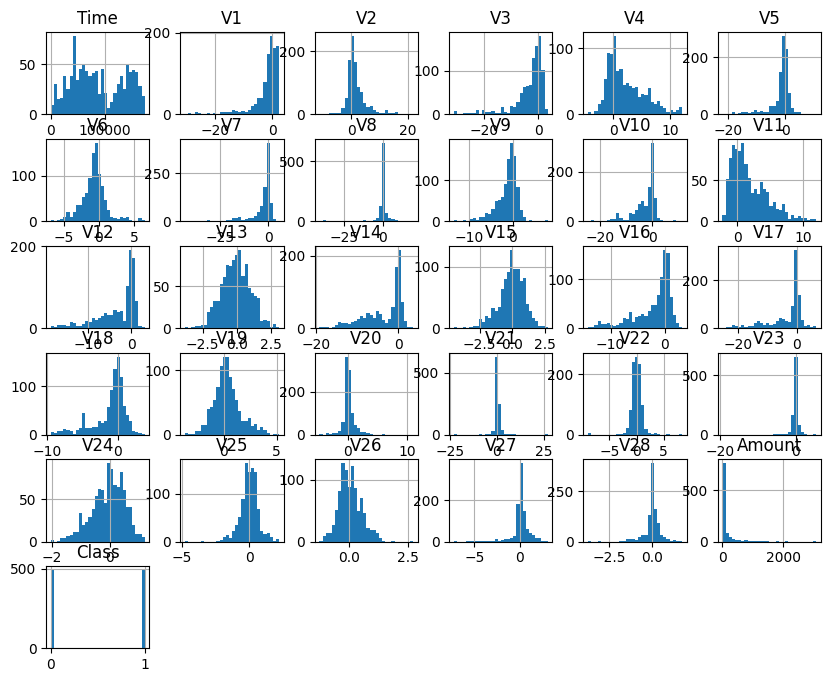

In [271]:
#plotting histograms of each of the variables of the new dataset
new_dataset.hist(bins=30,figsize=(10,8))
plt.show()

<Axes: >

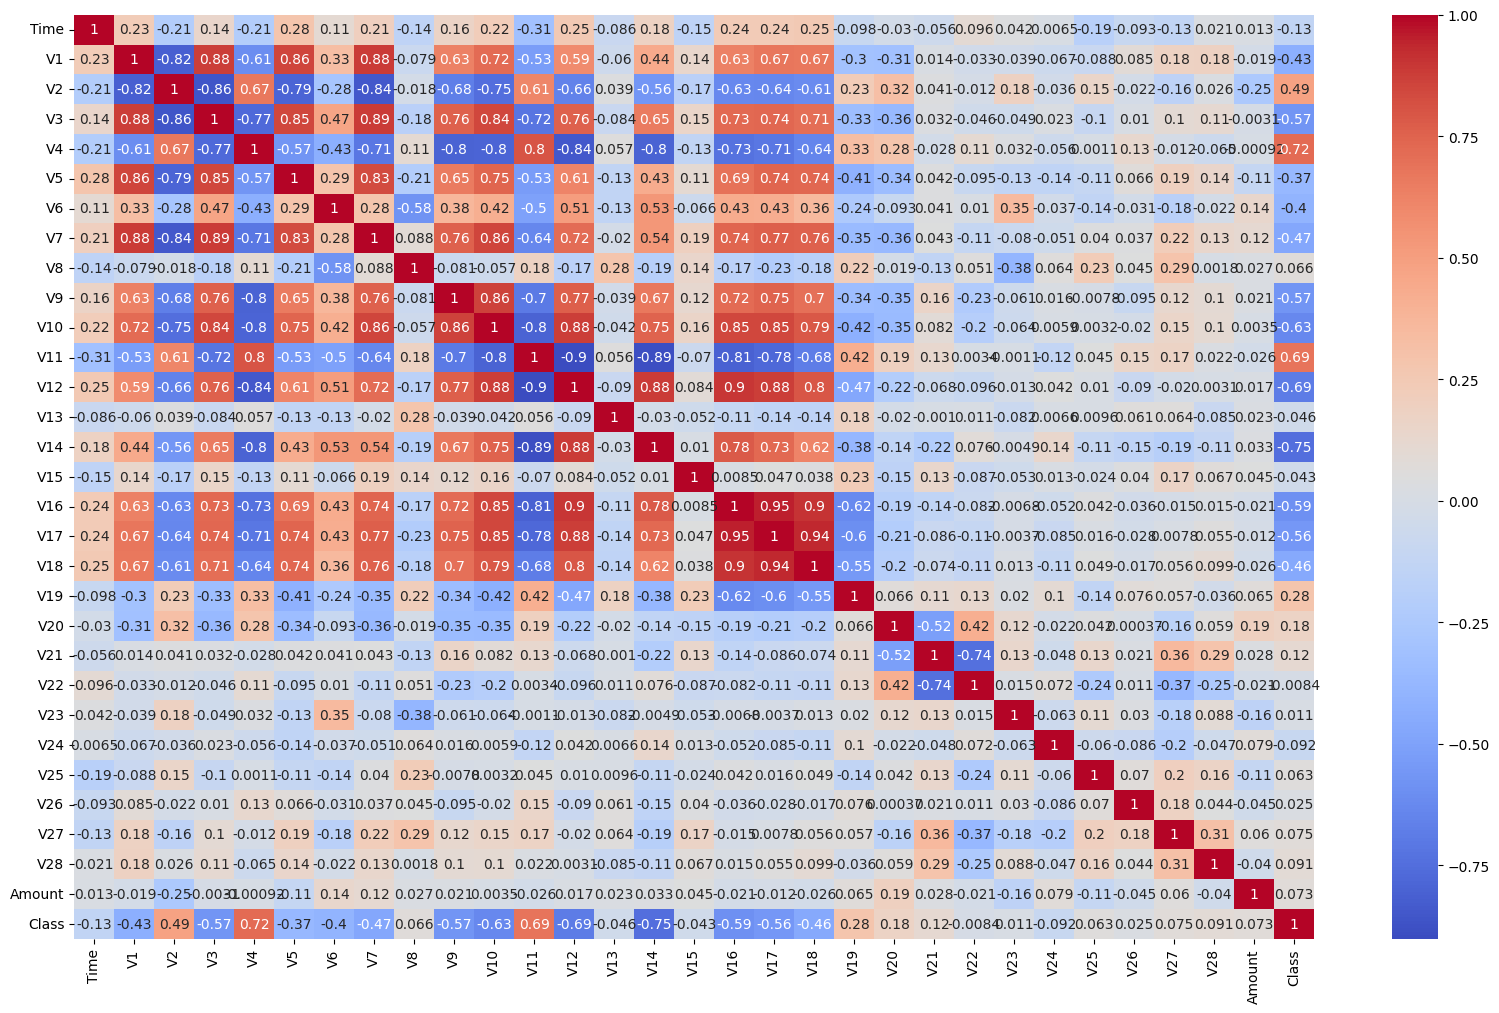

In [272]:
# correlation gives us relation between each varibale. how much each variable is contributing.
correlation =new_dataset.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation,annot=True,cmap="coolwarm")

In [273]:
## Seprating independent and dependent variable
target = new_dataset["Class"]
inputs = new_dataset.drop("Class",axis="columns")


## Model Building

In [274]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,stratify= target ,random_state=2)

In [275]:
print("Training data:{}".format(X_train.shape))
print("Test data:{}".format(X_test.shape))


Training data:(787, 30)
Test data:(197, 30)


### We can see that the training set has actually 787 observations and the test set has 197 observations.Now we will go for model building.Now we apply various machine learning algorithms to separate fraud and non-fraudalent cases and compare them with help of following two measures:

- Accuracy score is the number of correct predictions made divided by the total number of predictions made.
- The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.


**Logistic Regression**

In [276]:
lr= LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [277]:
## Accuracy on training data
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("The accuracy of the training data is=",format(training_data_accuracy,".2f"))
F1_score_lr=round(f1_score(X_train_prediction,y_train),2)
print("The F1 score for the training data is=",F1_score_lr)

The accuracy of the training data is= 0.95
The F1 score for the training data is= 0.94


In [278]:
#Classification Report for the training set
report = classification_report(X_train_prediction,y_train)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       410
           1       0.92      0.97      0.94       377

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [279]:
#Accuracy of the test data
X_test_prediction = lr.predict(X_test)
testing_data_accuracy_lr = round(accuracy_score(X_test_prediction,y_test),2)
print("The accuracy of the training data is=",format(testing_data_accuracy_lr,".2f"))
F1_score_lr_test=round(f1_score(X_test_prediction,y_test),2)
print("The F1 score for the training data is=",F1_score_lr_test)

The accuracy of the training data is= 0.94
The F1 score for the training data is= 0.94


In [280]:
#Classification Report for the testing set
report = classification_report(X_test_prediction,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       103
           1       0.92      0.96      0.94        94

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



**Decision Tree Classifier**

In [281]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [282]:
## Accuracy on training data
X_train_prediction = dt.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print("The accuracy of the training data is=",format(training_data_accuracy,".2f"))
F1_score_dt=round(f1_score(X_train_prediction,y_train),3)
print("The F1 score for the training data is=",F1_score_dt)

The accuracy of the training data is= 1.00
The F1 score for the training data is= 1.0


In [283]:
#Classification Report for the training set
report = classification_report(X_train_prediction,y_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



In [284]:
#Accuracy of the test data
X_test_prediction = dt.predict(X_test)
testing_data_accuracy_dt = round(accuracy_score(X_test_prediction,y_test),2)
print("The accuracy of the testing data is=",format(testing_data_accuracy_dt,".2f"))
F1_score_dt_test=round(f1_score(X_test_prediction,y_test),2)
print("The F1 score for the testing data is=",F1_score_dt_test)

The accuracy of the testing data is= 0.91
The F1 score for the testing data is= 0.91


In [285]:
#Classification Report for the testing set
report = classification_report(X_test_prediction,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       106
           1       0.88      0.95      0.91        91

    accuracy                           0.91       197
   macro avg       0.91      0.92      0.91       197
weighted avg       0.92      0.91      0.91       197



**Random-Forest**

In [286]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [287]:
## Accuracy on training data
X_train_prediction =rf.predict(X_train)
training_data_accuracy = round(accuracy_score(X_train_prediction, y_train),2)
print("The accuracy of the training data is=",format(training_data_accuracy,".2f"))
F1_score_rf=round(f1_score(X_train_prediction,y_train),3)
print("The F1 score for the training data is=",F1_score_rf)


The accuracy of the training data is= 1.00
The F1 score for the training data is= 1.0


In [288]:
#Classification Report for the training set
report = classification_report(X_train_prediction,y_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



In [289]:
#Accuracy of the test data
X_test_prediction = rf.predict(X_test)
testing_data_accuracy_rf = round(accuracy_score(X_test_prediction,y_test),2)
print("The accuracy of the training data is=",format(testing_data_accuracy_rf,".2f"))
F1_score_rf_test=round(f1_score(X_test_prediction,y_test),2)
print("The F1 score for the training data is=",F1_score_rf_test)

The accuracy of the training data is= 0.93
The F1 score for the training data is= 0.93


In [290]:
#Classification Report for the testing set
report = classification_report(X_test_prediction,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       110
           1       0.88      0.99      0.93        87

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197



### Report:

In [291]:
table=pd.DataFrame({"Model":["Logistic Regression","Decision Tree","Random Forest"],
                    "Accuracy in %":[100*np.round(testing_data_accuracy_lr,decimals=4),100*np.round(testing_data_accuracy_dt,decimals=4)
                                ,100*np.round(testing_data_accuracy_rf,decimals=4)],
                    "F1-Score":[F1_score_lr_test,F1_score_dt_test,F1_score_rf_test]})

In [292]:
table

,Model,Accuracy in %,F1-Score
0,Logistic Regression,94.0,0.94
1,Decision Tree,91.0,0.91
2,Random Forest,93.0,0.93


### All of the models have accuracy above 90 and f1 score close to 1 for the test Data.So all of this models perform good for the test data.For more robust models we need to have a large number of observations.